<font size=3>
    
# sklearn中的SVM
注意：使用SVM和KNN一样需要对数据标准化处理

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [21]:
iris_data = load_iris()

X = iris_data.data
y = iris_data.target

X = X[y<2,:2]
y = y[y<2]

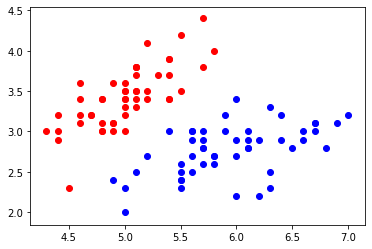

In [22]:
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b')

In [23]:
from sklearn.preprocessing import StandardScaler

standar = StandardScaler()

In [24]:
standar.fit(X)
X_stand = standar.transform(X)

In [25]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(C=1e9)
lin_svc.fit(X_stand,y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [26]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, alpha=0.75, cmap=custom_cmap)

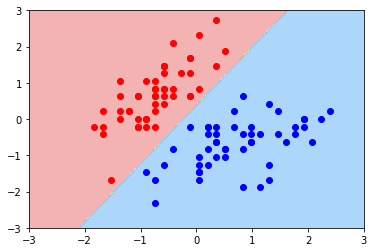

In [27]:
plot_decision_boundary(lin_svc,[-3,3,-3,3])
plt.scatter(X_stand[y==0,0],X_stand[y==0,1],color='r')
plt.scatter(X_stand[y==1,0],X_stand[y==1,1],color='b')

In [28]:
lin_svc2 = LinearSVC(C=0.01)
lin_svc2.fit(X_stand,y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

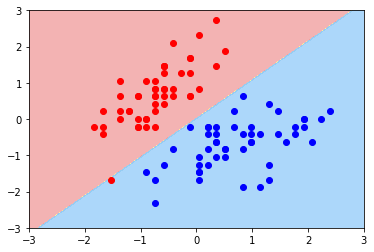

In [29]:
plot_decision_boundary(lin_svc2,[-3,3,-3,3])
plt.scatter(X_stand[y==0,0],X_stand[y==0,1],color='r')
plt.scatter(X_stand[y==1,0],X_stand[y==1,1],color='b')

<font size=3>

## C越大我们的容错空间越小，C越小则容错空间越大

下面我们改造绘制决策边界的方法，使得我们可以通过这个方法绘制出决策边界外另外两根直线的区域

In [30]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, alpha=0.75, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    # 中间的决策边界我们可以计算出来是 w0*x0+w1*x1+b = 0
    # 所以可以得知上下的直线方程有x1 = (-w0*x0 - b)/w1
    plot_x = np.linspace(axis[0],axis[1],200)
    up_y = (-w[0]*plot_x-b+1)/w[1]
    down_y = (-w[0]*plot_x-b-1)/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index],up_y[up_index],color='black')
    plt.plot(plot_x[down_index],down_y[down_index],color='black')

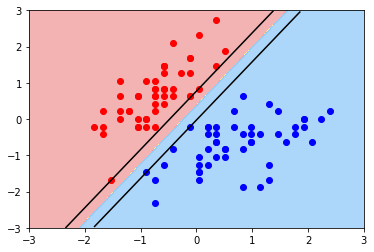

In [31]:
plot_decision_boundary(lin_svc,[-3,3,-3,3])
plt.scatter(X_stand[y==0,0],X_stand[y==0,1],color='r')
plt.scatter(X_stand[y==1,0],X_stand[y==1,1],color='b')

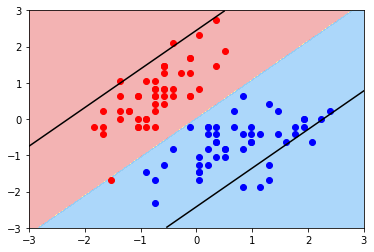

In [32]:
plot_decision_boundary(lin_svc2,[-3,3,-3,3])
plt.scatter(X_stand[y==0,0],X_stand[y==0,1],color='r')
plt.scatter(X_stand[y==1,0],X_stand[y==1,1],color='b')

In [37]:
iris_data = load_iris()

X = iris_data.data
y = iris_data.target

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline


def PolynomialSVC(degree,C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("Stand", StandardScaler()),
        ("svc", LinearSVC(C=C))
    ])

In [39]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('Stand',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [41]:
poly_svc.score(X_test,y_test)

1.0

In [42]:
import pandas as pd

ParserError: Error tokenizing data. C error: Expected 1 fields in line 8, saw 4
